# Data sample in kaggle

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(handle="mlg-ulb/creditcardfraud", force_download=True)

print("Path to dataset files:", path)


100%|██████████| 66.0M/66.0M [00:03<00:00, 19.9MB/s]

Extracting files...


Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [12]:
import shutil
import os

# Đường dẫn gốc (dataset từ Kaggle)
src = path

# Thư mục đích
dst = r".\dataset"

# Tạo thư mục đích nếu chưa có
os.makedirs(dst, exist_ok=True)

# Di chuyển tất cả các file
for filename in os.listdir(src):
    src_file = os.path.join(src, filename)
    dst_file = os.path.join(dst, filename)
    shutil.move(src_file, dst_file)

print("✅ Dataset đã được chuyển tới", dst)

✅ Dataset đã được chuyển tới .\dataset


# Demo Fraud detection

## Import Lib

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from scipy.stats import randint

from xgboost import XGBClassifier

print("✅ Import successfully")

✅ Import successfully


## Load data

In [15]:
df = pd.read_csv("./dataset/creditcard.csv")
X = df.drop(columns=['Class'])
y = df['Class']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##  Split Train/Valid/Test data

In [16]:
# 2. Tách train / validation / test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2,  stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42
)
# (60% train, 20% val, 20% test)
print("✅ Split data success")

✅ Split data success


## XGBoost Model

### Valid hyperparameter

D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[max_depth=2] Validation AUC: 0.9711


D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[max_depth=3] Validation AUC: 0.9711


D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[max_depth=4] Validation AUC: 0.9701


D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[max_depth=5] Validation AUC: 0.9701


D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[max_depth=6] Validation AUC: 0.9691


D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[max_depth=7] Validation AUC: 0.9631


D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[max_depth=8] Validation AUC: 0.9649


D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:13:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[max_depth=9] Validation AUC: 0.9684


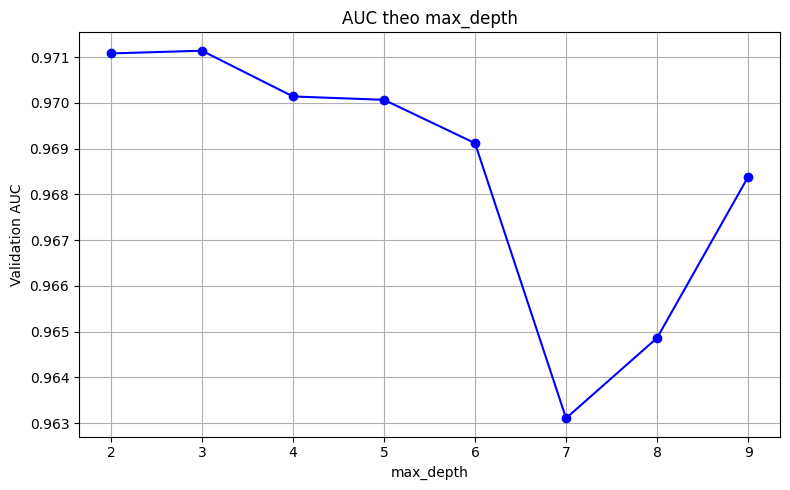


✅ Best model: max_depth=3, AUC=0.9711


In [18]:
max_depths = range(2,10)
best_model = None
best_auc = 0
best_depth = None

auc_scores = []

for depth in max_depths:
    model = XGBClassifier(
        max_depth=depth,
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        eval_metric='auc',
        use_label_encoder=False,
        random_state=42
    )
    model.fit(X_train, y_train)
    val_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, val_pred)
    print(f"[max_depth={depth}] Validation AUC: {auc:.4f}")

    auc_scores = auc_scores + [auc]
    if auc > best_auc:
        best_auc = auc
        best_model = model
        best_depth = depth

# 4. Vẽ biểu đồ AUC theo max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depths, auc_scores, marker='o', color='blue')
plt.title("AUC theo max_depth")
plt.xlabel("max_depth")
plt.ylabel("Validation AUC")
plt.xticks(max_depths)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\n✅ Best model: max_depth={best_depth}, AUC={best_auc:.4f}")

### Test Model & Find best threshold

In [19]:
# Dự đoán xác suất trên test set
test_pred = best_model.predict_proba(X_test)[:, 1]

# Tạo danh sách các threshold từ 0.0 đến 1.0 (bước 0.05)
thresholds = np.arange(0.4, 1, 0.005)
results = []

# Tính accuracy cho mỗi threshold
for threshold in thresholds:
    preds_binary = (test_pred >= threshold).astype(int)
    acc = accuracy_score(y_test, preds_binary)
    prec = precision_score(y_test, preds_binary, zero_division=0)
    rec = recall_score(y_test, preds_binary)
    f1 = f1_score(y_test, preds_binary)
    results.append({
        "threshold": threshold,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1
    })

# Chuyển thành DataFrame
df_result = pd.DataFrame(results)

# Tìm threshold có F1-score cao nhất
best_row = df_result.loc[df_result['f1_score'].idxmax()]
print(f"✅ Threshold tốt nhất theo F1-score: {best_row['threshold']:.4f}")
print(best_row)


✅ Threshold tốt nhất theo F1-score: 0.7350
threshold    0.735000
accuracy     0.999386
precision    0.824742
recall       0.816327
f1_score     0.820513
Name: 67, dtype: float64


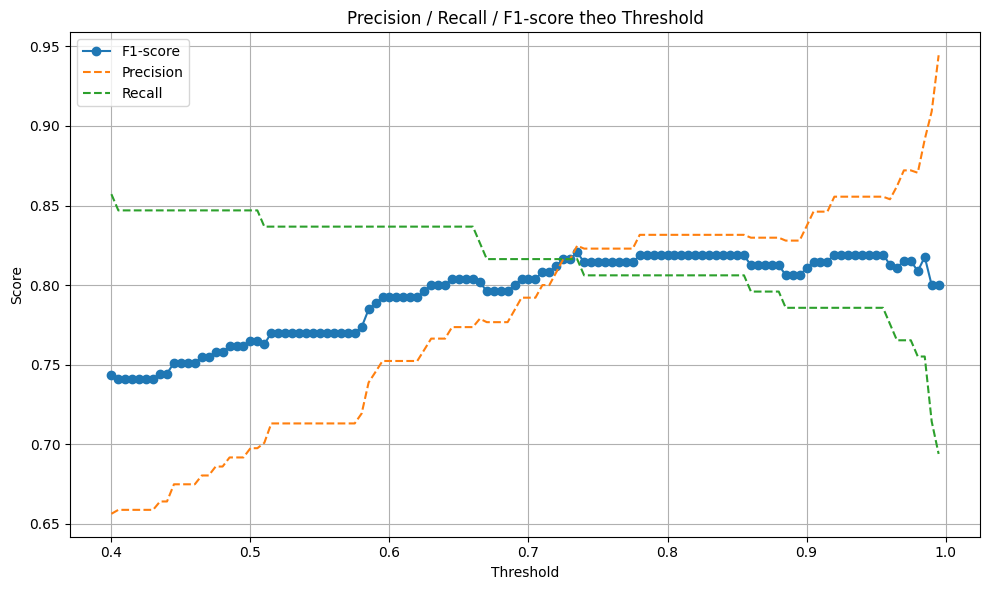

In [20]:
# 🎨 Vẽ biểu đồ F1 theo Threshold
plt.figure(figsize=(10, 6))
plt.plot(df_result["threshold"], df_result["f1_score"], label="F1-score", marker='o')
plt.plot(df_result["threshold"], df_result["precision"], label="Precision", linestyle='--')
plt.plot(df_result["threshold"], df_result["recall"], label="Recall", linestyle='--')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall / F1-score theo Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
df_result

,threshold,accuracy,precision,recall,f1_score
0,0.005,0.965486,0.043500,0.908163,0.083022
1,0.010,0.979126,0.070134,0.908163,0.130212
2,0.015,0.984235,0.091002,0.908163,0.165428
3,0.020,0.987711,0.113111,0.897959,0.200913
4,0.025,0.989783,0.133333,0.897959,0.232190
...,...,...,...,...,...
197,0.990,0.999386,0.909091,0.714286,0.800000
198,0.995,0.999403,0.944444,0.693878,0.800000
199,1.000,0.998280,0.000000,0.000000,0.000000
200,1.005,0.998280,0.000000,0.000000,0.000000


In [76]:
rs_test = pd.Series(test_pred, name = 'test_pred').round(4)
rs_test[rs_test > best_row["threshold"]]
# rs_test

165      0.9992
840      0.9999
1146     1.0000
2777     0.9818
3123     0.9930
          ...  
54894    0.9992
54930    0.9997
55014    0.9878
55071    1.0000
56421    0.9884
Name: test_pred, Length: 97, dtype: float32

## Stacking: XGBoost, LogisticRegression, RandomForest, LogisticRegression 

### Find Best XGBoost

In [21]:
param_dist = {
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 300),
    'scale_pos_weight': randint(50, 150)
}

xgb_base = XGBClassifier(eval_metric='auc', use_label_encoder=False, n_jobs=1)

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_
print("✅ Best XGB params:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:16:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:16:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:16:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:16:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not

✅ Best XGB params: {'max_depth': 6, 'n_estimators': 157, 'scale_pos_weight': 71}


### Training & Test Stack model

In [26]:
base_models = [
    ('xgb', best_xgb),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
]

meta_model = LogisticRegression(max_iter=1000)

stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Huấn luyện stacking
stack_model.fit(X_train, y_train)

# Dự đoán xác suất
y_proba = stack_model.predict_proba(X_test)[:, 1]

print("✅ Training data success")


D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:43:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\MyProject\python-tool\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\MyProject\python-tool\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:46:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

✅ Training data success


### Find best threshold

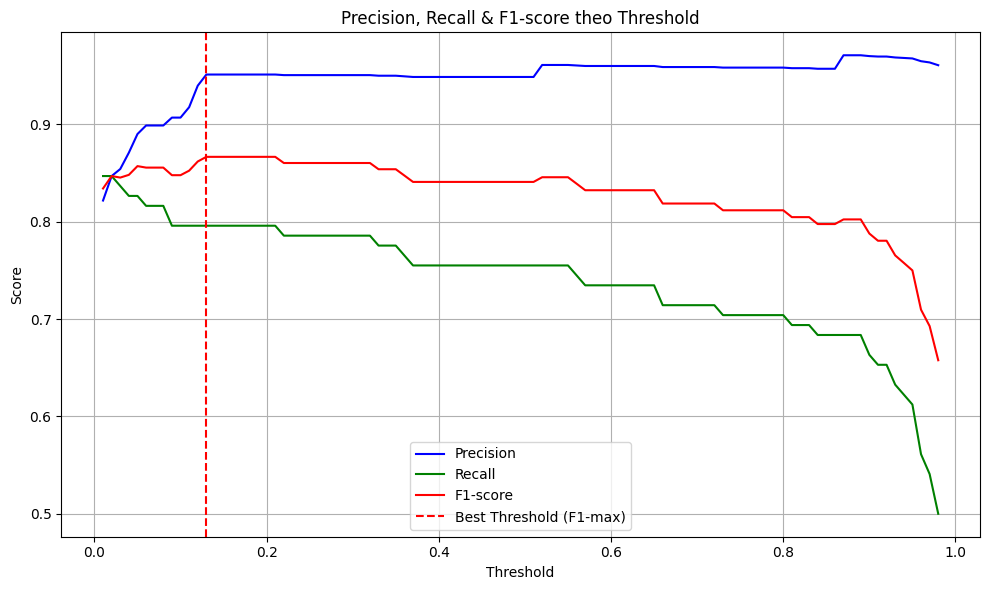

✅ Threshold tốt nhất theo F1-score: 0.1300
Precision score: 0.9512
Recall score: 0.7959
F1 score: 0.8667


In [27]:
# Tối ưu threshold theo F1
thresholds = np.arange(0.01, 0.99, 0.01)
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, f1s, label='F1-score', color='red')
plt.axvline(thresholds[np.argmax(f1s)], color='red', linestyle='--', label='Best Threshold (F1-max)')

plt.title('Precision, Recall & F1-score theo Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

best_index = np.argmax(f1s)

print(f"✅ Threshold tốt nhất theo F1-score: {thresholds[best_index]:.4f}")
print(f"Precision score: {precisions[best_index]:.4f}")
print(f"Recall score: {recalls[best_index]:.4f}")
print(f"F1 score: {f1s[best_index]:.4f}")